In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline
import statsmodels.formula.api as smf

##Loading the timeseries data for COHA

In [2]:
ts_df = pd.read_csv('./data/SWOW_prediction/eval/time_series/ts_df.csv')


In [3]:
ts_df.head()

,outputs,words,year,train_section,property,count,outputs_z
0,2.270283,generally,2000,0,previous_link,1359.0,0.577798
1,2.606771,accepted,2000,0,previous_link,149.0,1.129912
2,3.037258,tolerant,2000,0,previous_link,91.0,1.836261
3,1.318298,loner,2000,0,previous_link,53.0,-0.984233
4,2.268311,undesirable,2000,0,previous_link,55.0,0.574562


In [4]:
ts_df = ts_df.groupby(['words','year','property'])[['outputs_z','count']].mean().reset_index() #Taking average over different training section

/tmp/ipykernel_44290/3730027808.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = 10)
/tmp/ipykernel_44290/3730027808.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize = 10)


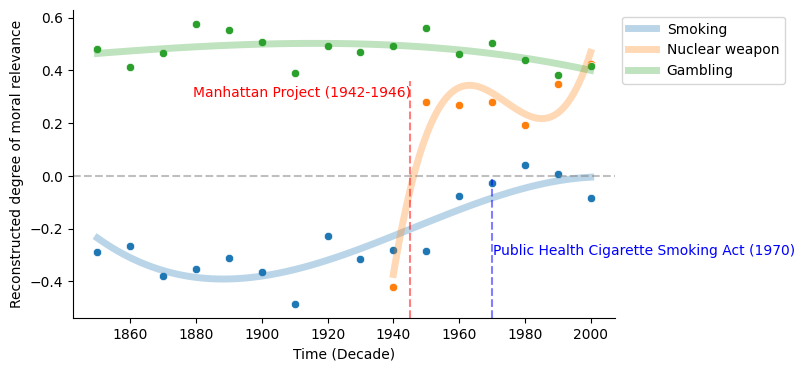

In [5]:
words = ['smoking','nuclear weapon']
w2 = 'gambling'
k = 3
all_words = ts_df.loc[ts_df.property == 'previous_link'].loc[ts_df['count'] >= 0]
word_df = all_words.loc[all_words.words.isin(words)].groupby(['words','year','property'])[['outputs_z','count']].mean().reset_index()

fig,ax = plt.subplots(figsize = (7, 4))
sns.scatterplot(data = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[0])]
                ,
              x = 'year',
              y = 'outputs_z',   
                color = 'tab:blue'
               
            )
x = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[0])].groupby(['year']).outputs_z.mean().reset_index().year
y = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[0])].groupby(['year']).outputs_z.mean().reset_index().outputs_z
spl = UnivariateSpline(x, y,k=k, s = None)
xs  = np.linspace(x.min(), x.max(), 100)


plt.plot(xs, spl(xs), 'tab:blue', lw=5,alpha=0.3,label = str.capitalize(words[0]))

ax.text(x = 1970+ 0.2, y = -0.3, s = 'Public Health Cigarette Smoking Act (1970)',color = 'blue')
ax.axvline(x = 1970, color = 'blue', ymax = 0.45, linestyle = '--',alpha = 0.5)

sns.scatterplot(data = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[1])]
                ,
              x = 'year',
              y = 'outputs_z',   
                color = 'tab:orange'
               
            )
x = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[1])].groupby(['year']).outputs_z.mean().reset_index().year
y = word_df.loc[(word_df.property == 'previous_link') & (word_df.words == words[1])].groupby(['year']).outputs_z.mean().reset_index().outputs_z
spl = UnivariateSpline(x, y,k=k,s = None)
xs  = np.linspace(x.min(), x.max(), 100)

plt.plot(xs, spl(xs), 'tab:orange', lw=5,alpha=0.3,label = str.capitalize(words[1])) #Nuclear weapons


ax.text(x = 1879, y = 0.3, s = 'Manhattan Project (1942-1946)',color = 'red')
ax.axvline(x = 1945, color = 'red', ymax = 0.77, linestyle = '--',alpha = 0.5)


w2_df = all_words.loc[all_words.words == w2]
x = w2_df.loc[(w2_df.property == 'previous_link')].groupby(['year']).outputs_z.mean().reset_index().year
y = w2_df.loc[w2_df.property == 'previous_link'].groupby(['year']).outputs_z.mean().reset_index().outputs_z
spl = UnivariateSpline(x, y,k=k,s = None)
xs  = np.linspace(x.min(), x.max(), 100)

sns.scatterplot(data = w2_df,
             x = 'year',y = 'outputs_z', ax = ax,color ='tab:green')
plt.plot(xs, spl(xs), 'tab:green', lw=5,alpha=0.3,label = str.capitalize(w2))

ax.axhline(y = 0, color = 'grey', linestyle = '--',alpha = 0.5)


sns.despine()
ax.legend(fontsize = 10,bbox_to_anchor = (1, 1), loc = 2)
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 10)
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 10)
plt.xlabel('Time (Decade)', fontsize = 10)
plt.ylabel('Reconstructed degree of moral relevance',fontsize = 10)
plt.savefig(f'notebooks/figs/{words[0]}_{words[1]}_{w2}_ts.png', dpi = 700, bbox_inches = 'tight')
plt.savefig(f'notebooks/figs/{words[0]}_{words[1]}_{w2}_ts.pdf', dpi = 700, bbox_inches = 'tight')
plt.show()